# FACS analysis

Flag-YFP-CTA(argwt)-8xcodonrepeats-linker-DHFRwt-puroR (v1) TTG lentivirus in HEK293T and GCN2KO  .  Used LV1 stock : .5 ml  virus per 6 well plate. Selected with 2 ug/ml puro.

*  plasmid reporters 
    1. 8xTTGv2: Flag-YFP-CTA(argwt)linker-8xTTG-DHFRwt
    ctattgctattgctattgctattg: cta1
    ctactattgctactattgctacta: cta2
    ctactactattgctactactacta: cta3
    2. 8xCTAv2: Flag-YFP-CTA(argwt)linker-8xcta-DHFRwt
* 6 conditions
    1. rich, - 10 uM TMP
    2. -leu, - 10 uM TMP
 
* Measurement voltages: FSC = 280, SSC = 260, FITC = 275 **on the lsrII not fortessa, as usual**
* 10,000 events for some samples, not 20,000 as usual.(12 well)

### Analysis Steps
  0. consider mean of fcs/ssc gated population of 10000 events @ for each sample separately
  1. thresholding for reasonable FSC/SSC values and NO fluorescence value based thresholding
  2. rich condition normalization
  

**did gDNA seq on cta1/2/3 and confirmed that cta 3= cta1. so took out that data. cta1=cta4ttg4. cta2=cta6ttg2.

### Globals

In [1]:
%matplotlib inline
# globals
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
from FlowCytometryTools import FCMeasurement

In [2]:
# matplotlib default customizations
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ['blue','green','red',
                                           'cyan','magenta','orange','olive',
                                          'yellow', 'palegreen','black',])
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.subplot.hspace'] = 0.5
mpl.rcParams['figure.subplot.wspace'] = 0.5
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

### Experiment Annotations

In [5]:
sampleids = {1: 'WT-CTA8 Rich NOTMP 1',
 2: 'WT-CTA8 -Leu NOTMP 1',
 3: 'WT-CTA4TTG4 Rich NOTMP 1',
 4: 'WT-CTA4TTG4 -Leu NOTMP 1',
 5: 'WT-CTA6TTG2 Rich NOTMP 1',
 6: 'WT-CTA6TTG2 -Leu NOTMP 1',
 9: 'WT-TTG8 Rich NOTMP 1',
 10: 'WT-TTG8 -Leu NOTMP 1',
 11: 'GCN2KO-CTA8 Rich NOTMP 1',
 12: 'GCN2KO-CTA8 -Leu NOTMP 1',
 13: 'GCN2KO-CTA4TTG4 Rich NOTMP 1',
 14: 'GCN2KO-CTA4TTG4 -Leu NOTMP 1',
 15: 'GCN2KO-CTA6TTG2 Rich NOTMP 1',
 16: 'GCN2KO-CTA6TTG2 -Leu NOTMP 1',
 19: 'GCN2KO-TTG8 Rich NOTMP 1',
 20: 'GCN2KO-TTG8 -Leu NOTMP 1',
 }

#make sure this is right!



timepoints = {
    'Specimen_001': 12,
    'Specimen_002': 24,
    'Specimen_003': 48,
 }

fsc_threshold = 30000
ssc_threshold = 12500

### Read in data and calculate median and mean after thresholding by FSC and SSC ###

In [10]:
time

48

In [6]:
fcsFiles = os.listdir('../fcs_files/')
fcsFiles = ['../fcs_files/' + File for File in fcsFiles if File.endswith('.fcs')]

processeddata = dict()
for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-2] ) #change last split to -1 if there's no extra  _Tube_001-72
    sampleid = sampleids[ID]
    time = timepoints[re.search('Specimen_00\d+',File).group()]
    sampleid = sampleid.replace(' ','_') + '_%d'%time # replace space by _
    fcsdata = FCMeasurement(ID= sampleid, datafile=File)
    processeddata[ sampleid ] = dict()
    subset = np.logical_and( fcsdata.data['FSC-A'] > fsc_threshold, fcsdata.data['SSC-A'] > ssc_threshold )
    processeddata[ sampleid ]['fsc_median'] = fcsdata.data['FSC-A'][subset].median()
    processeddata[ sampleid ]['fitc_mean'] = fcsdata.data['FITC-A'][subset].mean()
    processeddata[ sampleid ]['fitc_median'] = fcsdata.data['FITC-A'][subset].median()
    processeddata[ sampleid ]['fitc_q25'] = fcsdata.data['FITC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fitc_q75'] = fcsdata.data['FITC-A'][subset].quantile(q=0.75)
    processeddata[ sampleid ]['fsc_q25'] = fcsdata.data['FSC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fsc_q75'] = fcsdata.data['FSC-A'][subset].quantile(q=0.75)       
    
data = pd.DataFrame.from_dict( processeddata, orient='index' )
data

,fsc_q75,fitc_median,fitc_q25,fsc_q25,fitc_mean,fitc_q75,fsc_median
GCN2KO-CTA4TTG4_-Leu_NOTMP_1_12,96246.953125,81.000000,36.450001,65636.250000,156.825226,184.275002,79694.078125
GCN2KO-CTA4TTG4_-Leu_NOTMP_1_24,90877.601562,141.750000,58.320000,60733.339844,322.160522,345.059998,74993.804688
GCN2KO-CTA4TTG4_-Leu_NOTMP_1_48,90252.000000,540.270020,157.949997,61947.281250,1467.548706,1584.359985,75300.164062
GCN2KO-CTA4TTG4_Rich_NOTMP_1_12,98469.214844,38.070000,12.150000,65824.966797,64.326569,75.330002,80491.492188
GCN2KO-CTA4TTG4_Rich_NOTMP_1_24,92008.513672,29.160000,7.290000,60650.080078,50.033585,57.509998,74651.101562
GCN2KO-CTA4TTG4_Rich_NOTMP_1_48,92428.378906,22.680000,0.810000,62811.621094,37.457863,48.599998,76180.601562
GCN2KO-CTA6TTG2_-Leu_NOTMP_1_12,92760.382812,81.000000,36.450001,63767.500000,148.525879,174.149994,77119.921875
GCN2KO-CTA6TTG2_-Leu_NOTMP_1_24,90671.865234,110.970001,51.029999,61749.364258,202.521805,238.949997,75640.562500
GCN2KO-CTA6TTG2_-Leu_NOTMP_1_48,93600.343750,299.700012,120.690002,64695.781250,630.406189,720.900024,78399.640625
GCN2KO-CTA6TTG2_Rich_NOTMP_1_12,96142.990234,47.790001,19.440001,63653.075195,80.331345,91.529999,78059.015625


### Calculate Mean, Median and Stddev by Replicates

In [7]:
# create a sample label by removing replicate number
data['samplelabel'] = map( lambda x: '_'.join(x.split('_')[:-2] + [x.split('_')[-1]]), data.index)
# groupby sample label
groupeddata = data.groupby( ['samplelabel'] )
# calcuate median, std, mean of fitc channel across replicates
summarizedData = groupeddata['fitc_mean'].agg([np.mean, np.std, np.median]) ##THIS NEEDS TO BE FIXED

In [8]:
summarizedData

,mean,std,median
samplelabel,,,
GCN2KO-CTA4TTG4_-Leu_NOTMP_12,156.825226,NaN,156.825226
GCN2KO-CTA4TTG4_-Leu_NOTMP_24,322.160522,NaN,322.160522
GCN2KO-CTA4TTG4_-Leu_NOTMP_48,1467.548706,NaN,1467.548706
GCN2KO-CTA4TTG4_Rich_NOTMP_12,64.326569,NaN,64.326569
GCN2KO-CTA4TTG4_Rich_NOTMP_24,50.033585,NaN,50.033585
GCN2KO-CTA4TTG4_Rich_NOTMP_48,37.457863,NaN,37.457863
GCN2KO-CTA6TTG2_-Leu_NOTMP_12,148.525879,NaN,148.525879
GCN2KO-CTA6TTG2_-Leu_NOTMP_24,202.521805,NaN,202.521805
GCN2KO-CTA6TTG2_-Leu_NOTMP_48,630.406189,NaN,630.406189


### Subtract NoTMP background from TMP samples

In [9]:
tmpsamples = map( lambda x: x.find('NOTMP') == -1, summarizedData.index)
summarizedDataTmp = summarizedData[tmpsamples]
summarizedDataNoTmp = summarizedData[np.logical_not(tmpsamples)]
summarizedDataNoTmp.index = map( lambda x: x.replace('_NOTMP',''), summarizedDataNoTmp.index)
summarizedDataTmp.index = map( lambda x: x.replace('_TMP',''), summarizedDataTmp.index)

In [8]:
summarizedDataTmp

,mean,std,median


In [10]:
summarizedDataNoTmp

,mean,std,median
GCN2KO-CTA4TTG4_-Leu_12,156.825226,NaN,156.825226
GCN2KO-CTA4TTG4_-Leu_24,322.160522,NaN,322.160522
GCN2KO-CTA4TTG4_-Leu_48,1467.548706,NaN,1467.548706
GCN2KO-CTA4TTG4_Rich_12,64.326569,NaN,64.326569
GCN2KO-CTA4TTG4_Rich_24,50.033585,NaN,50.033585
GCN2KO-CTA4TTG4_Rich_48,37.457863,NaN,37.457863
GCN2KO-CTA6TTG2_-Leu_12,148.525879,NaN,148.525879
GCN2KO-CTA6TTG2_-Leu_24,202.521805,NaN,202.521805
GCN2KO-CTA6TTG2_-Leu_48,630.406189,NaN,630.406189
GCN2KO-CTA6TTG2_Rich_12,80.331345,NaN,80.331345


In [11]:
meanSubtractedData = pd.DataFrame()
meanSubtractedData['mean'] = summarizedDataTmp['mean'] - summarizedDataNoTmp['mean']
meanSubtractedData['std'] = np.sqrt(np.square(summarizedDataTmp['std']) + np.square(summarizedDataNoTmp['std']))

### Normalize by the 'Rich' sample for both mean, median and adjust Stddev

In [11]:
def normalize(row, statistic):
    split = row[0].split('_')
    normalizationsample = '_'.join(split[:1]  + ['Rich'] + split[2:])
    return row[1][statistic] / summarizedDataTmp.ix[normalizationsample][statistic]

def normalizestdevmean(row):
    split = row[0].split('_')
    normalizationsample = '_'.join(split[:1]  + ['Rich'] + split[2:])    
    return row[1]['normalizedMean'] * np.sqrt(
                                           np.square(row[1]['std']/row[1]['mean']) +
                                          np.square(summarizedDataTmp.ix[normalizationsample]['std'] / 
                                          summarizedDataTmp.ix[normalizationsample]['mean']) )

for statistic in ['mean']:
    summarizedDataTmp['normalized' + statistic.capitalize()] = map(
        lambda row: normalize(row, statistic), summarizedDataTmp.iterrows()
    )
    
summarizedDataTmp['normalizedStd'] = map( normalizestdevmean, summarizedDataTmp.iterrows())
summarizedDataTmp['normalizedStdErr'] = summarizedDataTmp['normalizedStd'] / np.sqrt(3)
summarizedDataTmp['stderr'] = summarizedDataTmp['std'] / np.sqrt(3)
summarizedDataTmp['samplelabel'] = summarizedDataTmp.index


In [11]:
def normalize(row, statistic):
    split = row[0].split('_')
    normalizationsample = '_'.join(split[:1]  + ['Rich'] + split[2:])
    return row[1][statistic] / summarizedDataNoTmp.ix[normalizationsample][statistic]

def normalizestdevmean(row):
    split = row[0].split('_')
    normalizationsample = '_'.join(split[:1]  + ['Rich'] + split[2:])    
    return row[1]['normalizedMean'] * np.sqrt(
                                           np.square(row[1]['std']/row[1]['mean']) +
                                          np.square(summarizedDataNoTmp.ix[normalizationsample]['std'] / 
                                          summarizedDataNoTmp.ix[normalizationsample]['mean']) )

for statistic in ['mean']:
    summarizedDataNoTmp['normalized' + statistic.capitalize()] = map(
        lambda row: normalize(row, statistic), summarizedDataNoTmp.iterrows()
    )
    
summarizedDataNoTmp['normalizedStd'] = map( normalizestdevmean, summarizedDataNoTmp.iterrows())
summarizedDataNoTmp['normalizedStdErr'] = summarizedDataNoTmp['normalizedStd'] / np.sqrt(3)
summarizedDataNoTmp['stderr'] = summarizedDataNoTmp['std'] / np.sqrt(3)
summarizedDataNoTmp['samplelabel'] = summarizedDataNoTmp.index

In [12]:
summarizedDataNoTmp

,mean,std,median,normalizedMean,normalizedStd,normalizedStdErr,stderr,samplelabel
GCN2KO-CTA4TTG4_-Leu_12,156.825226,NaN,156.825226,2.437954,NaN,NaN,NaN,GCN2KO-CTA4TTG4_-Leu_12
GCN2KO-CTA4TTG4_-Leu_24,322.160522,NaN,322.160522,6.438886,NaN,NaN,NaN,GCN2KO-CTA4TTG4_-Leu_24
GCN2KO-CTA4TTG4_-Leu_48,1467.548706,NaN,1467.548706,39.178656,NaN,NaN,NaN,GCN2KO-CTA4TTG4_-Leu_48
GCN2KO-CTA4TTG4_Rich_12,64.326569,NaN,64.326569,1.000000,NaN,NaN,NaN,GCN2KO-CTA4TTG4_Rich_12
GCN2KO-CTA4TTG4_Rich_24,50.033585,NaN,50.033585,1.000000,NaN,NaN,NaN,GCN2KO-CTA4TTG4_Rich_24
GCN2KO-CTA4TTG4_Rich_48,37.457863,NaN,37.457863,1.000000,NaN,NaN,NaN,GCN2KO-CTA4TTG4_Rich_48
GCN2KO-CTA6TTG2_-Leu_12,148.525879,NaN,148.525879,1.848916,NaN,NaN,NaN,GCN2KO-CTA6TTG2_-Leu_12
GCN2KO-CTA6TTG2_-Leu_24,202.521805,NaN,202.521805,3.715645,NaN,NaN,NaN,GCN2KO-CTA6TTG2_-Leu_24
GCN2KO-CTA6TTG2_-Leu_48,630.406189,NaN,630.406189,15.624060,NaN,NaN,NaN,GCN2KO-CTA6TTG2_-Leu_48
GCN2KO-CTA6TTG2_Rich_12,80.331345,NaN,80.331345,1.000000,NaN,NaN,NaN,GCN2KO-CTA6TTG2_Rich_12


### Plot time series of mean data for 3 conditions and all variants

In [14]:
variant

'WT-8x-CTA'

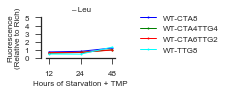

In [13]:

conditions = ['-Leu']
times = ['12','24','48']
#sampleOrder = np.array([1,4,0,2,3,5])
xlocations =np.array([0,1,2])
variants = ['WT-CTA8_-Leu','WT-CTA4TTG4_-Leu','WT-CTA6TTG2_-Leu','WT-TTG8_-Leu']


fig = plt.figure()

axcount = 0
for condition in conditions:
    axcount += 1
    ax = fig.add_subplot(1,1,axcount)
    for variant in variants:
        subset = np.logical_and(
        summarizedDataNoTmp['samplelabel'].apply(
            lambda label: label.find(variant) != -1
        ),
        summarizedDataNoTmp['samplelabel'].apply(
            lambda label: label.find(condition) != -1
        )
        )
        subsetdata = summarizedDataNoTmp[subset]
        x = xlocations
        y = subsetdata['normalizedMean']
        ax.plot(x, y, marker = 'o', markersize=2, linewidth=1, label = variant.replace('_-Leu',  ''))
        
    spineOffset = {'left': 5, 'bottom': 0}   
    [ spine.set_position(('outward',spineOffset[loc])) 
         if loc in ['left','bottom'] else spine.set_color('none') 
         for loc, spine in ax.spines.items() ]         
    ax.xaxis.set( ticks_position = 'bottom')
    ax.yaxis.set( ticks_position = 'left')
    timepoints = map(lambda x: x.split('_')[-1], subsetdata.index)
    ax.xaxis.set(ticks = x, ticklabels = timepoints)
    ax.set_xlim(-0.1,max(x) + 0.1)
    ax.set_ylim(bottom = 0, top = 5)
    ax.yaxis.set( major_locator = MaxNLocator(5) )
    ax.set_xlabel('Hours of Starvation + TMP')
    if axcount == 1:
        ax.set_ylabel('Fluorescence\n(Relative to Rich)')
    if axcount == 1:
        ax.legend(loc = 2, bbox_to_anchor = (1.25,1.25))
    ax.set_title(condition.replace('-',u'– '))  
    
fig.set_size_inches([1.25,.75])
fig.subplots_adjust(wspace = 0.75)
fig.savefig('../figures/20170803_normalizedmean_WT_minustmp_8xttgcta12_linegraph_forpaper.svg')
fig.savefig('../figures/20170803_normalizedmean_WT_minustmp_8xttgcta12_linegraph_forpaper.png',bbox_inches='tight')
fig.savefig('../figures/20170803_normalizedmean_WT_minustmp_8xttgcta12_linegraph_forpaper.pdf',bbox_inches='tight')

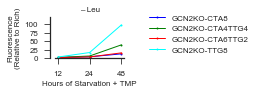

In [14]:

conditions = ['-Leu']
times = ['12','24','48']
#sampleOrder = np.array([1,4,0,2,3,5])
xlocations =np.array([0,1,2])
variants = ['GCN2KO-CTA8_-Leu','GCN2KO-CTA4TTG4_-Leu','GCN2KO-CTA6TTG2_-Leu','GCN2KO-TTG8_-Leu']


fig = plt.figure()

axcount = 0
for condition in conditions:
    axcount += 1
    ax = fig.add_subplot(1,1,axcount)
    for variant in variants:
        subset = np.logical_and(
        summarizedDataNoTmp['samplelabel'].apply(
            lambda label: label.find(variant) != -1
        ),
        summarizedDataNoTmp['samplelabel'].apply(
            lambda label: label.find(condition) != -1
        )
        )
        subsetdata = summarizedDataNoTmp[subset]
        x = xlocations
        y = subsetdata['normalizedMean']
        ax.plot(x, y, marker = 'o', markersize=2, linewidth=1, label = variant.replace('_-Leu',  ''))
        
    spineOffset = {'left': 5, 'bottom': 0}   
    [ spine.set_position(('outward',spineOffset[loc])) 
         if loc in ['left','bottom'] else spine.set_color('none') 
         for loc, spine in ax.spines.items() ]         
    ax.xaxis.set( ticks_position = 'bottom')
    ax.yaxis.set( ticks_position = 'left')
    timepoints = map(lambda x: x.split('_')[-1], subsetdata.index)
    ax.xaxis.set(ticks = x, ticklabels = timepoints)
    ax.set_xlim(-0.1,max(x) + 0.1)
    ax.set_ylim(bottom = 0, top = 120)
    ax.yaxis.set( major_locator = MaxNLocator(5) )
    ax.set_xlabel('Hours of Starvation + TMP')
    if axcount == 1:
        ax.set_ylabel('Fluorescence\n(Relative to Rich)')
    if axcount == 1:
        ax.legend(loc = 2, bbox_to_anchor = (1.25,1.25))
    ax.set_title(condition.replace('-',u'– '))  
    
fig.set_size_inches([1.25,.75])
fig.subplots_adjust(wspace = 0.75)
fig.savefig('../figures/20170803_normalizedmean_gcn2ko_minustmp_8xttgcta12_linegraph_forpaper.svg')
fig.savefig('../figures/20170803_normalizedmean_gcn2KO_minustmp_8xttgcta12_linegraph_forpaper.png',bbox_inches='tight')
fig.savefig('../figures/20170803_normalizedmean_gcn2ko_minustmp_8xttgcta12_linegraph_forpaper.pdf',bbox_inches='tight')

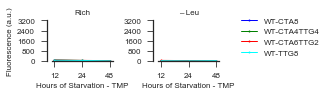

In [21]:

conditions = ['Rich','-Leu']
times = ['12','24','48']
#sampleOrder = np.array([1,4,0,2,3,5])
xlocations =np.array([0,1,2])
variants = ['WT-CTA8_','WT-CTA4TTG4_','WT-CTA6TTG2_','WT-TTG8_']

fig = plt.figure()

axcount = 0
for condition in conditions:
    axcount += 1
    ax = fig.add_subplot(1,2,axcount)
    for variant in variants:
        subset = np.logical_and(
        summarizedDataNoTmp['samplelabel'].apply(
            lambda label: label.find(variant) != -1
        ),
        summarizedDataNoTmp['samplelabel'].apply(
            lambda label: label.find(condition) != -1
        )
        )
        subsetdata = summarizedDataNoTmp[subset]
        x = xlocations
        y = subsetdata['mean']
        ax.plot(x, y, label = variant.replace('_', ''),marker = 'o',markersize=2,linewidth=1)
        
    spineOffset = {'left': 5, 'bottom': 0}   
    [ spine.set_position(('outward',spineOffset[loc])) 
         if loc in ['left','bottom'] else spine.set_color('none') 
         for loc, spine in ax.spines.items() ]         
    ax.xaxis.set( ticks_position = 'bottom')
    ax.yaxis.set( ticks_position = 'left')
    timepoints = map(lambda x: x.split('_')[-1], subsetdata.index)
    ax.xaxis.set(ticks = x, ticklabels = timepoints)
    ax.set_xlim(-0.1,max(x) + 0.1)
    ax.set_ylim(bottom = 0, top = 3200)
    ax.yaxis.set( major_locator = MaxNLocator(5) )
    if axcount == 1:
        ax.set_ylabel('Fluorescence (a.u.)')
    ax.set_xlabel('Hours of Starvation - TMP')
    
    if axcount == 2:
        ax.legend(loc = 2, bbox_to_anchor = (1.25,1.25))
    ax.set_title(condition.replace('-',u'– '))  
    
fig.set_size_inches([3,.75])
fig.subplots_adjust(wspace = 0.75)
fig.savefig('../figures/20170803_rawdatamean_minustmp_wt_8xttgcta12_linegraph_forpaper.svg')
fig.savefig('../figures/20170803_rawdatamean_minustmp_wt_8xttgcta12_linegraph_forpaper.pdf',bbox_inches='tight')
fig.savefig('../figures/20170803_rawdatamean_minustmp_wt_8xttgcta12_linegraph_forpaper.png',bbox_inches='tight')


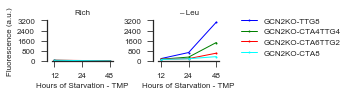

In [24]:

conditions = ['Rich','-Leu']
times = ['12','24','48']
#sampleOrder = np.array([1,4,0,2,3,5])
xlocations =np.array([0,1,2])
variants = ['GCN2KO-TTG8_','GCN2KO-CTA4TTG4_','GCN2KO-CTA6TTG2_','GCN2KO-CTA8_']

fig = plt.figure()

axcount = 0
for condition in conditions:
    axcount += 1
    ax = fig.add_subplot(1,2,axcount)
    for variant in variants:
        subset = np.logical_and(
        summarizedDataNoTmp['samplelabel'].apply(
            lambda label: label.find(variant) != -1
        ),
        summarizedDataNoTmp['samplelabel'].apply(
            lambda label: label.find(condition) != -1
        )
        )
        subsetdata = summarizedDataNoTmp[subset]
        x = xlocations
        y = subsetdata['mean']
        ax.plot(x, y, label = variant.replace('_', ''),marker = 'o',markersize=2,linewidth=1)
        
    spineOffset = {'left': 5, 'bottom': 0}   
    [ spine.set_position(('outward',spineOffset[loc])) 
         if loc in ['left','bottom'] else spine.set_color('none') 
         for loc, spine in ax.spines.items() ]         
    ax.xaxis.set( ticks_position = 'bottom')
    ax.yaxis.set( ticks_position = 'left')
    timepoints = map(lambda x: x.split('_')[-1], subsetdata.index)
    ax.xaxis.set(ticks = x, ticklabels = timepoints)
    ax.set_xlim(-0.1,max(x) + 0.1)
    ax.set_ylim(bottom = 0, top = 3200)
    ax.yaxis.set( major_locator = MaxNLocator(5) )
    ax.set_xlabel('Hours of Starvation - TMP')
    
    if axcount == 1:
        ax.set_ylabel('Fluorescence (a.u.)')
    if axcount == 2:
        ax.legend(loc = 2, bbox_to_anchor = (1.25,1.25))
    ax.set_title(condition.replace('-',u'– '))  
    
fig.set_size_inches([3,.75])
fig.subplots_adjust(wspace = 0.75)
fig.savefig('../figures/20170803_rawdatamean_minustmp_gcn2ko_8xttgcta12_linegraph_forpaper.svg')
fig.savefig('../figures/20170803_rawdatamean_minustmp_gcn2ko_8xttgcta12_linegraph_forpaper.pdf',bbox_inches='tight')
fig.savefig('../figures/20170803_rawdatamean_minustmp_gcn2ko_8xttgcta12_linegraph_forpaper.png',bbox_inches='tight')




worried that by the 48h time point there might be differential changes in codons in starved relative to rich due to diff seeding densities in rich and thus diff points at which rich conditions hits media depletion & starts accumulating reporter (i.e. CGA) -- repeat w/o letting rich hit confluency?

^ yep , issue fixed by repeating 48 h time point w/ same settings / cells!

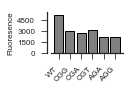

In [111]:
conditions = ['Rich']
times = ['12','24','48']
sampleOrder = np.array([52,34,25,43,7,16])
xlocations =np.array([0,1,2,3,4,5])
variants = ['WT','CGG','CGA','CGT','AGA','AGG']

fig = plt.figure()
ax = fig.add_subplot(111)



ax.bar(xlocations, summarizedDataTmp['mean'][sampleOrder], align='center', facecolor = 'grey',edgecolor='black',linewidth=1 )
#ax.errorbar(xlocations, data['relative_s35met'][sampleOrder], 
            #data['sem'][sampleOrder], linestyle='None', color = 'black', elinewidth=0.5, capsize=2, capthick=0.5 )

spineOffset = {'left': 4, 'bottom': 0}   
[ spine.set_position(('outward',spineOffset[loc])) 
     if loc in ['left','bottom'] else spine.set_color('none') 
     for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )
ax.set_ylim(0,5500)
ax.set_xticks(xlocations)
xticklabels= variants
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

ax.set_ylabel( 'Fluoresence')

fig.set_size_inches([1.29,.75])

fig.savefig('../figures/rawdata_rich_plustmp_24h.svg')
